In [14]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
'''Age, Cabin, Embarked 결과치 확인'''

'Age, Cabin, Embarked 결과치 확인'

In [17]:
def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(train, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived

def pie_chart(feature_survived):
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

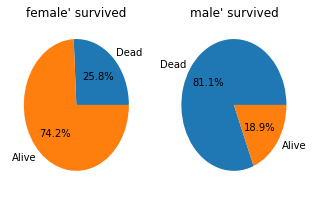

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [18]:
'성별과 생존률'
c = show_pie_chart(train, 'Sex')
c

In [28]:
'''여성의 생존률이 높다'''

'여성의 생존률이 높다'

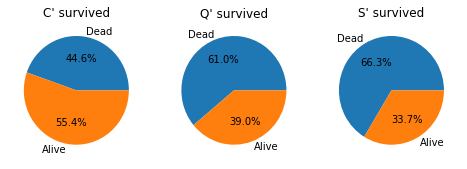

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [19]:
'탑승항과 생존률'
c = show_pie_chart(train, 'Embarked')
c

In [ ]:
'''C > Q > S 순으로 생존률이 높다'''

In [20]:
'title 추출'
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Sir           1
Mme           1
Lady          1
Countess      1
Ms            1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

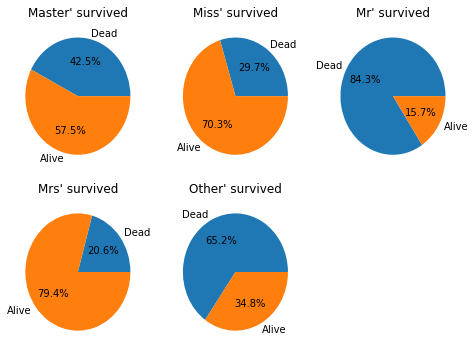

Survived,Dead,Alive
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,15,8


In [21]:
'MR, Miss, Mrs, Master 제외 이름 변경'
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')   
train['Title'].value_counts()

c = show_pie_chart(train, 'Title')
c

In [29]:
'''Miss, Mrs에 비해 Mr의 생존률이 낮다'''

'Miss, Mrs에 비해 Mr의 생존률이 낮다'

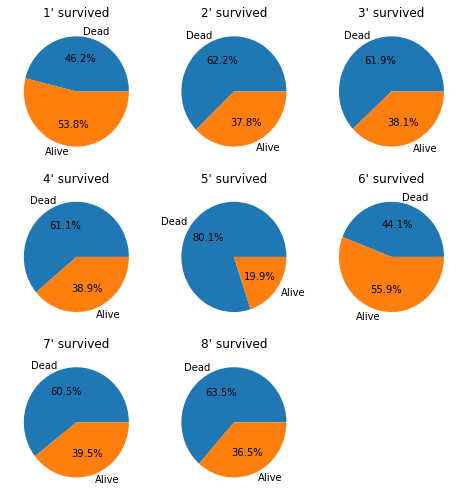

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [22]:
'나이와 생존률 관계'
meanAge = train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
    nullIndex = train[(train.Title == index) & (train.Age.isnull())].index
    train.loc[nullIndex, 'Age'] = row[0]

train['AgeCategory'] = pd.qcut(train.Age, 8, labels=range(1, 9))
train.AgeCategory = train.AgeCategory.astype(int)

c = show_pie_chart(train, 'AgeCategory')
c

In [ ]:
'''나이가 어릴 수록 생존률이 높다'''

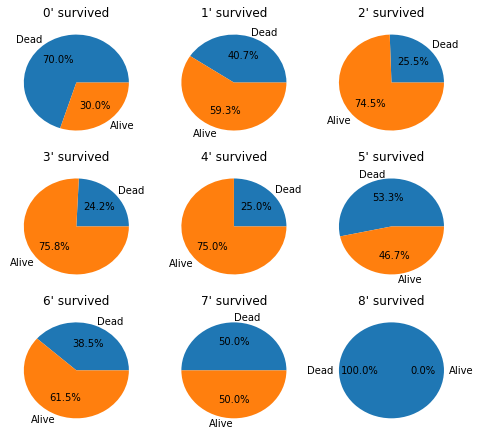

Survived,Dead,Alive
CabinCategory,,
0,481,206
1,24,35
2,12,35
3,8,25
4,8,24
5,8,7
6,5,8
7,2,2
8,1,0


In [23]:
'방번호와 생존률'
train.Cabin.fillna('N', inplace=True)
train["CabinCategory"] = train["Cabin"].str.slice(start=0, stop=1)  
train["CabinCategory"] = train['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

c = show_pie_chart(train, 'CabinCategory')
c

In [ ]:
'''방번호가 높을 수록 생존률이 높다'''

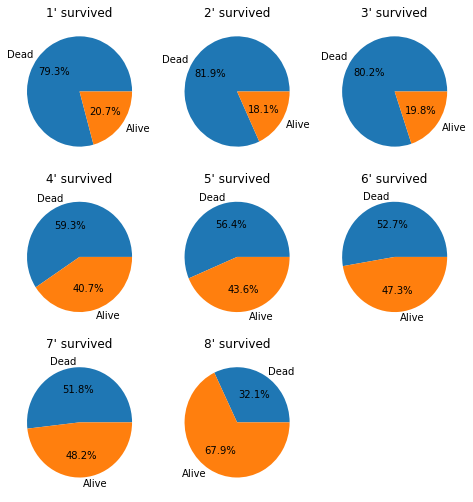

Survived,Dead,Alive
FareCategory,,
1,111,29
2,68,15
3,89,22
4,67,46
5,62,48
6,59,53
7,57,53
8,36,76


In [25]:
'운임과 생존률'
train.Fare.fillna(0)
train['FareCategory'] = pd.qcut(train.Fare, 8, labels=range(1, 9))
train.FareCategory = train.FareCategory.astype(int)

c = show_pie_chart(train, 'FareCategory')
c

In [ ]:
'''운임이 높을 수록 생존률이 높다'''

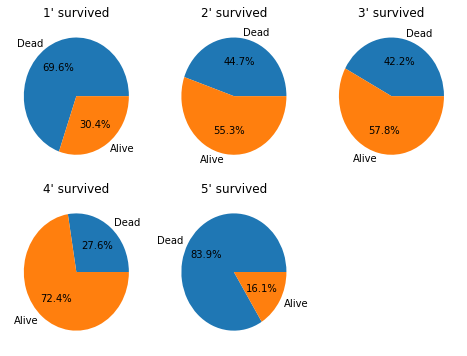

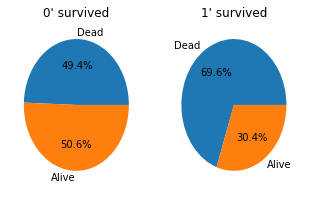

Survived,Dead,Alive
IsAlone,,
0,175,179
1,374,163


In [26]:
'가족수와 생존률'
train['Family'] = train['SibSp'] + train['Parch'] + 1
train.loc[train["Family"] > 4, "Family"] = 5

train['IsAlone'] = 1
train.loc[train['Family'] > 1, 'IsAlone'] = 0


c = show_pie_chart(train, 'Family')
c

c = show_pie_chart(train, 'IsAlone')
c

In [ ]:
'''4인 가족의 생존률이 높고 가족이 많으면 생존률이 낮다, 혼자 탑승한 사람들은 가족과 함께 했을때 보다 생존률이 낮다'''

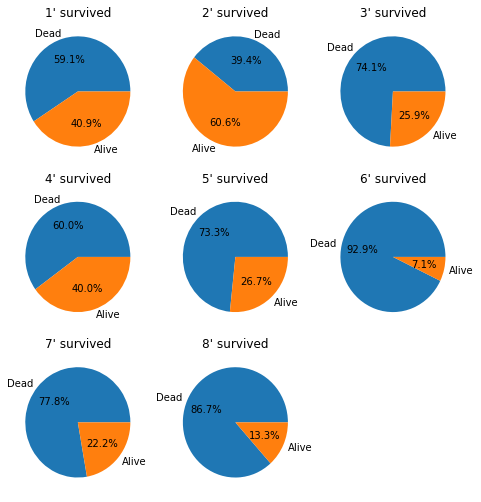

Survived,Dead,Alive
TicketCategory,,
1,136,94
2,91,140
3,272,95
4,6,4
5,11,4
6,13,1
7,7,2
8,13,2


In [27]:
'티켓정보와 생존률'
train['TicketCategory'] = train.Ticket.str.split()
train['TicketCategory'] = [i[-1][0] for i in train['TicketCategory']]
train['TicketCategory'] = train['TicketCategory'].replace(['8', '9', 'L'], '8')
train['TicketCategory'] = pd.factorize(train['TicketCategory'])[0] + 1

c = show_pie_chart(train, 'TicketCategory')
c

In [ ]:
'''티켓 수가 높을 수록 생존률이 높아진다'''